In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pydataset import data

In [2]:
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [3]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




## A. On average, which manufacturer has the best miles per gallon?

In [5]:
mpg['avg_mpg'] = (mpg.hwy + mpg.cty) / 2

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [83]:
mpg.groupby('manufacturer').avg_mpg.mean().idxmax()

'honda'

In [84]:
mpg.groupby('manufacturer').avg_mpg.mean().sort_values().tail(1)

manufacturer
honda    28.5
Name: avg_mpg, dtype: float64

## B. How many different manufacturers are there?

In [16]:
len(mpg.groupby('manufacturer').count())

15

In [19]:
mpg.manufacturer.unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [85]:
mpg.manufacturer.nunique()

15

In [18]:
len(mpg.manufacturer.unique())


15

## C. How many different models are there?

In [15]:
len(mpg.groupby('model').count())

38

In [20]:
mpg.model.unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [86]:
mpg.model.nunique()

38

In [21]:
len(mpg.model.unique())

38

## D. Do automatic or manual cars have better miles per gallon?

In [26]:
mpg['auto'] = mpg['trans'].str.contains('auto')

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,auto_or_manual,auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,True,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,False,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,True,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,False,False


In [27]:
mpg.groupby('auto').avg_mpg.mean()

auto
False    22.227273
True     19.130573
Name: avg_mpg, dtype: float64

# 2. Joining and Merging

## Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [28]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [29]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [30]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [31]:
pd.merge(
    users.rename(columns={'id': 'user_id', 'name': 'username'}),
    roles.rename(columns={'name': 'role_name'}),
    left_on='role_id', right_on='id', how='left')

,user_id,username,role_id,id,role_name
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [32]:
pd.merge(
    users.rename(columns={'id': 'user_id', 'name': 'username'}),
    roles.rename(columns={'name': 'role_name'}),
    left_on='role_id', right_on='id', how='right')

#a right join removes any values in the users table that are not in the roles table

,user_id,username,role_id,id,role_name
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [33]:
pd.merge(
    users.rename(columns={'id': 'user_id', 'name': 'username'}),
    roles.rename(columns={'name': 'role_name'}),
    left_on='role_id', right_on='id', how='outer')

#an outer join combines all the values, even the ones that aren't shared with the other table 

,user_id,username,role_id,id,role_name
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [35]:
pd.merge(
    users.rename(columns={'id': 'user_id', 'name': 'username'}),
    roles.rename(columns={'name': 'role_name'}),
    left_on='role_id', right_on='id', how='left')

SyntaxError: invalid syntax (<ipython-input-35-d648291beaf8>, line 4)

In [37]:
users_test = users.drop(columns='role_id')
roles_test = roles.drop(columns='id')
dropped_fks = pd.merge(users_test, roles_test)
dropped_fks

,id,name


# 3. Getting data from SQL databases

## A. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [46]:
from env import host, user, password

def get_db_url(user, host, password, db):
    url = (f'mysql+pymysql://{user}:{password}@{host}/{db}')
    return url

In [47]:
get_db_url

<function __main__.get_db_url(user, host, password, db)>

## B. Use your function to obtain a connection to the employees database

In [49]:
pd.read_sql('select * from employees limit 10 offset 50', get_db_url(user, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27
5,10056,1961-09-01,Brendon,Bernini,F,1990-02-01
6,10057,1954-05-30,Ebbe,Callaway,F,1992-01-15
7,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13
8,10059,1953-09-19,Alejandro,McAlpine,F,1991-06-26
9,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02


## C. Once you have successfully run a query:
    
    ### Intentionally make a typo in the database url. What kind of error message do you see?
    
    ###Intentionally make an error in your SQL query. What does the error message look like?

In [50]:
def typo_get_db_url(user, host, password, db):
    url = (f'mysql+pyysql://{user}:{password}@{host}/{db}')
    return url

In [94]:
pd.read_sql('select * from employees limit 10 offset 50', typo_get_db_url(user, host, password, 'employees'))

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:mysql.pyysql

In [95]:
pd.read_sql('select * from empoyees limit 10 offset 50', get_db_url(user, host, password, 'employees'))

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.empoyees' doesn't exist")
[SQL: select * from empoyees limit 10 offset 50]
(Background on this error at: http://sqlalche.me/e/13/f405)

## D. Read the employees and titles tables into two separate dataframes

In [61]:
employees_sql = '''
select *
from employees;
'''

titles_sql = '''
select *
from titles;
'''

In [62]:
employees = pd.read_sql(employees_sql, get_db_url(user, host, password, 'employees'))
    
employees.head(10)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [63]:
titles = pd.read_sql(titles_sql, get_db_url(user, host, password, 'employees'))

titles.head(10)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
6,10005,Staff,1989-09-12,1996-09-12
7,10006,Senior Engineer,1990-08-05,9999-01-01
8,10007,Senior Staff,1996-02-11,9999-01-01
9,10007,Staff,1989-02-10,1996-02-11


## E. Visualize the number of employees with each title.

In [96]:
current_employees = titles.to_date == titles.to_date.max()

current_employees.head(10)

0     True
1     True
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9    False
Name: to_date, dtype: bool

In [97]:
current_employee_titles = titles[current_employees]

current_employee_titles.head(10)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
7,10006,Senior Engineer,1990-08-05,9999-01-01
8,10007,Senior Staff,1996-02-11,9999-01-01
13,10009,Senior Engineer,1995-02-18,9999-01-01
14,10010,Engineer,1996-11-24,9999-01-01
17,10012,Senior Engineer,2000-12-18,9999-01-01


In [99]:
current_title_values = current_employee_titles.groupby('title').emp_no.count()

current_title_values

title
Assistant Engineer     3588
Engineer              30983
Manager                   9
Senior Engineer       85939
Senior Staff          82024
Staff                 25526
Technique Leader      12055
Name: emp_no, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

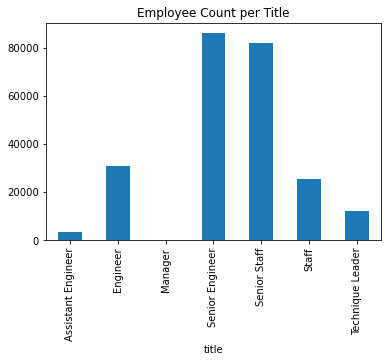

In [106]:
current_title_values.plot.bar()

plt.title('Employee Count per Title')

plt.show

## F. Join the employees and titles dataframes together.

In [66]:
emp_titles = employees.merge(titles, on='emp_no')

emp_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


## G. Visualize how frequently employees change titles.

In [68]:
emp_titles.groupby('emp_no').title.count()

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

In [88]:
emp_titles.groupby('emp_no').title.count().value_counts()

1    159754
2    137256
3      3014
Name: title, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

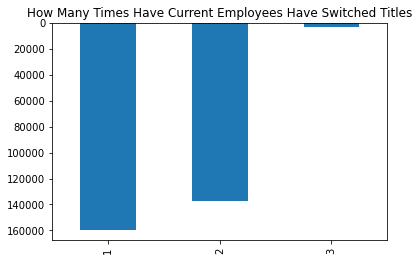

In [111]:
emp_titles.groupby('emp_no').title.count().value_counts().plot.bar()

plt.title('How Many Times Have Current Employees Have Switched Titles')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show

## H. For each title, find the hire date of the employee that was hired most recently with that title.

In [112]:
emp_titles.groupby('title').from_date.max()

title
Assistant Engineer    2000-02-01
Engineer              2002-08-01
Manager               1996-08-30
Senior Engineer       2002-08-01
Senior Staff          2002-08-01
Staff                 2000-02-01
Technique Leader      2000-02-01
Name: from_date, dtype: object

## I. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [79]:
title_dept_sql = '''
select emp_no, title, dept_no
from employees
join dept_emp using (emp_no)
join titles using (emp_no);
'''

In [80]:
title_dept = pd.read_sql(title_dept_sql, get_db_url(user, host, password, 'employees'))

title_dept.head(10)

,emp_no,title,dept_no
0,10001,Senior Engineer,d005
1,10002,Staff,d007
2,10003,Senior Engineer,d004
3,10004,Engineer,d004
4,10004,Senior Engineer,d004
5,10005,Senior Staff,d003
6,10005,Staff,d003
7,10006,Senior Engineer,d005
8,10007,Senior Staff,d008
9,10007,Staff,d008


In [113]:
titles_crosstab = pd.crosstab(title_dept.title, title_dept.dept_no)

titles_crosstab

dept_no,d001,d002,d003,d004,d005,d006,d007,d008,d009
title,,,,,,,,,
Assistant Engineer,0,0,0,6445,7769,1831,0,378,298
Engineer,0,0,0,49649,58135,13852,0,2986,2362
Manager,2,2,2,4,2,4,2,2,4
Senior Engineer,0,0,0,42205,49326,11864,0,2570,2027
Senior Staff,13940,12139,12274,1270,1247,0,36191,11637,13925
Staff,16196,13929,14342,1478,1424,0,41808,13495,16150
Technique Leader,0,0,0,6557,7683,1795,0,393,309


# 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [114]:
chipotle_sql = '''
select *
from orders;
'''

In [116]:
chipotle_orders = pd.read_sql(chipotle_sql, get_db_url(user, host, password, 'chipotle'))

chipotle_orders.head(10)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


## A. What is the total price for each order?

In [117]:
chipotle_orders['item_price'] = chipotle_orders.item_price.str.replace('$', '').astype(float)

chipotle_orders.head(10)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
6,7,3,1,Side of Chips,nan,1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25


In [119]:
order_totals = chipotle_orders.groupby('order_id').item_price.sum()

order_totals.sample(10)

order_id
1200    14.25
1007    11.77
1256    10.68
1449    95.39
861     11.38
365     12.50
950     11.38
1057    31.25
1043    14.70
1271    34.46
Name: item_price, dtype: float64

## B. What are the most popular 3 items?

In [123]:
top_three = chipotle_orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)

top_three

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [124]:
chipotle_orders.groupby('item_name').item_price.sum().nlargest(1, keep='all')

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64